# BIG DATA & AI BOOTCAMP

### Big Data Track (3)
### Capstone Project ll
### 2nd Notebook: Machine Learning Using PySpark Notebook

#### Team Name: Desert Ninjas
#### Team Members:
1. Reema Alaswad
2. Maha  Alhazzani
3. Aljohara Alkanhal
4. Raghad Aleisa
5. Eman Aldosari

***

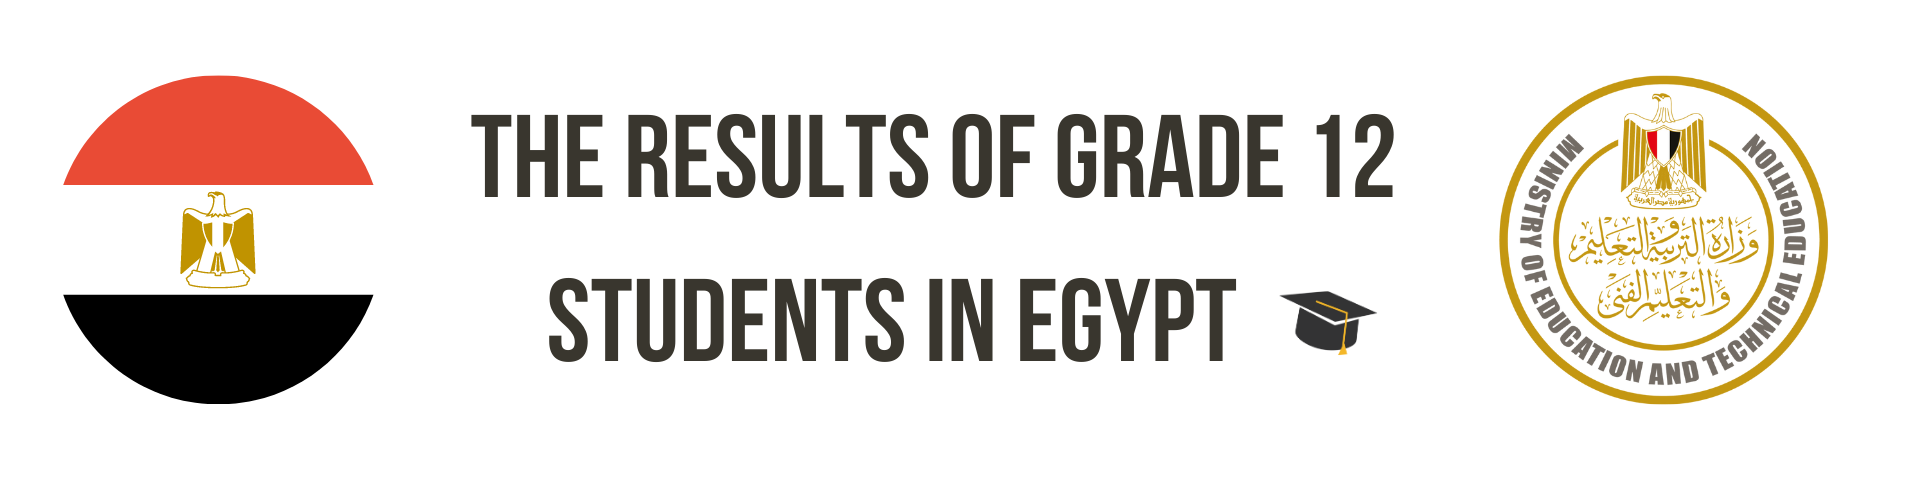

#### Project Objective:
The goal of this project is to forecast if the students can enroll in one of the public institutions in Egypt based on their current major and a few extracted attributes using data from a third-year secondary school dataset that was web scraped from the standardized tests in Egypt.
#### Dataset Description:
This dataset provides Egyptian student’s public results information. Including the student’s unique desk identifier number during the exam (this is unique for all students across Egypt), their gender and school name, the administration and the city their school belongs to, and how many test attempts they had. Lastly, for each attempt, it lists all the courses they can take depending on their branch and what score they have achieved for each course. Most of the courses will be calculated in the total score except for three courses; religion, national education, and economics Statistics. The dataset consists of 45 features and 683k records, which were taken for one year only; 2022.
#### Dataset Columns: 
| Feature | Description | Possibilities |
| :- | :- | :- |
| **Desk Number** | Student seat number (unique identifier) | Many possibilities |
| **School Name** | Student's school name | Many possibilities |
| **Administration** | Administration Area that the school belongs to | Many possibilities |
| **City** | Governate of school | Many possibilities |
| **Branch** | Student specialization branch | [Science - Health sciences,Science – Mathematics, Literature] |
| **Gender** | Student’s gender | [Female, Male] |
| **Number of Attempts** | Number of attempts allowed for each student | [First attempt only, Both attempts, Second attempt only] |
| | All of the following columns will be repeated for the second attempt students. | |
| **Percentage** | Student scoring percentage | 0-100% |
| **Status** | Student passing status | [Passed, second attempt, failed] |
| **Status 2nd** | Second attempt student passing status | [Passed, did not attend, failed] |
| **Arabic** | Arabic subject score | 0-80 |
| **First Foreign Language** | First foreign language subject score | 0-50 |
| **Second Foreign Language** | Second foreign language  subject score | 0-40 |
| **Pure Mathematics** | Pure mathematics subject score | 0-60 |
| **History** | History subject score | 0-60 |
| **Geography** | Geography subject score | 0-60 |
| **Philosophy** | Philosophy subject score | 0-60 |
| **Psychology** | Psychology subject score | 0-60 |
| **Chemistry** | Chemistry subject score | 0-60 |
| **Biology** | Biology subject score | 0-60 |
| **Geology** | Geology subject score | 0-60 |
| **Applied Math** | Applied mathematics subject score | 0-60 |
| **Physics** | Physics subject score | 0-60 |
| **Total** | The total score for the student | 0-410 |
| **Religion** | Religion subject score | 0-25 |
| **National Education** | National education subject score | 0-25 |
| **Economics Statistics** | Economics statistics subject score | 0-50 |

***
#### 🔺 2nd Notebook: Machine Learning Using PySpark Notebook 🔺
1. Importing Packages
2. Dataset Loading
3. Data Preprocessing
    - Removing unnecessary columns.
4. Data Cleaning
   - Missing Values Handling.
   - Descriptive Statistics.
   - Remove the lease frequent categories in each category column.
5. Model Building
    - Feature Engineering and Feature Selection.
        - Categorical columns encoding.
        - Vector Assembler.
        - Data Splitting.
    - Train Models.
    - Model Evaluation.
    - Model Selection.
    - Model Optimization - Hyperparameter Tuning.
    - Pipeline for Best Model.  
5. Final Result  
*** 

### 1. Importing Packages

In [ ]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pyspark[sql]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#other imports we will be needed in this notebook
import pyspark
from pyspark.sql import functions as F
from pyspark.sql import types
from pyspark.sql.functions import col, isnan, when, count, explode, array, lit
from pyspark.ml.feature import StringIndexer
from pyspark.sql.types import IntegerType

from pyspark.ml.feature import Imputer, VectorAssembler, StringIndexer
from pyspark.ml.regression import RandomForestRegressor, DecisionTreeRegressor, GBTRegressor, LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

from pyspark.ml.classification import LogisticRegression

from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

from pyspark.ml.classification import DecisionTreeClassifier, RandomForestClassifier, LogisticRegression, GBTClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

from pyspark.ml.tuning import CrossValidator, ParamGridBuilder, CrossValidatorModel
from pyspark.ml import Pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Dataset Loading

In [ ]:
spark = pyspark.sql.SparkSession.builder.getOrCreate()

In [ ]:
data = spark.read.csv('/content/drive/MyDrive/capstone_project2_preprocessed_dataset.csv',
                     sep=',',
                     inferSchema=True,
                     header=True,
                     multiLine=True)
data.printSchema()

root
 |-- desk_no: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- branch: string (nullable = true)
 |-- city: string (nullable = true)
 |-- administration: string (nullable = true)
 |-- school_name: string (nullable = true)
 |-- school_type: string (nullable = true)
 |-- homeschooling: string (nullable = true)
 |-- mixed_school: string (nullable = true)
 |-- no_of_attempts: string (nullable = true)
 |-- no_of_failed_courses: integer (nullable = true)
 |-- can_join_uni: string (nullable = true)
 |-- final_grade: string (nullable = true)
 |-- percentage: double (nullable = true)
 |-- status: string (nullable = true)
 |-- total: double (nullable = true)
 |-- arabic: double (nullable = true)
 |-- first_foreign_lang: double (nullable = true)
 |-- second_foreign_lang: double (nullable = true)
 |-- history: double (nullable = true)
 |-- geography: double (nullable = true)
 |-- philosophy: double (nullable = true)
 |-- psychology: double (nullable = true)
 |-- biology: do

In [ ]:
#View the dataset
data.show()

+-------+------+--------------------+----+--------------+--------------------+--------------------+-------------+------------+------------------+--------------------+------------+-----------+----------+--------------+-----+------+------------------+-------------------+-------+---------+----------+----------+-------+-------+---------+-------+----------------+------------+--------+------------------+--------------------+--------------+--------------------+---------+----------+----------------------+-----------------------+-----------+-------------+--------------+--------------+-----------+-----------+-------------+-----------+--------------------+----------------+------------+----------------------+------------------------+
|desk_no|gender|              branch|city|administration|         school_name|         school_type|homeschooling|mixed_school|    no_of_attempts|no_of_failed_courses|can_join_uni|final_grade|percentage|        status|total|arabic|first_foreign_lang|second_foreign_lang

### 3. Data Preprocessing

#### 3.1 Removing columns

In [ ]:
# desk_no and school_name columns are useless to us --> Drop them
# total, total_2nd, percentage, and percentage_2nd cause data lackage --> Drop them
drop_cols = ['desk_no', 'school_name','total', 'total_2nd','percentage', 'percentage_2nd']

data = data.drop(*drop_cols)

### 4. Data Preprocessing 

#### 4.1 Missing values handling

In [ ]:
#check for nulls
data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in data.columns]).show() 

+------+------+----+--------------+-----------+-------------+------------+--------------+--------------------+------------+-----------+------+------+------------------+-------------------+-------+---------+----------+----------+-------+-------+---------+-------+----------------+------------+--------+------------------+--------------------+----------+----------+----------------------+-----------------------+-----------+-------------+--------------+--------------+-----------+-----------+-------------+-----------+--------------------+----------------+------------+----------------------+------------------------+
|gender|branch|city|administration|school_type|homeschooling|mixed_school|no_of_attempts|no_of_failed_courses|can_join_uni|final_grade|status|arabic|first_foreign_lang|second_foreign_lang|history|geography|philosophy|psychology|biology|geology|chemistry|physics|pure_mathematics|applied_math|religion|national_education|economics_statistics|status_2nd|arabic_2nd|first_foreign_lang_2n

In [ ]:
data.show(truncate=False)

+------+-------------------------+----+--------------+--------------------+-------------+------------+------------------+--------------------+------------+-----------+--------------+------+------------------+-------------------+-------+---------+----------+----------+-------+-------+---------+-------+----------------+------------+--------+------------------+--------------------+-----------------------------+----------+----------------------+-----------------------+-----------+-------------+--------------+--------------+-----------+-----------+-------------+-----------+--------------------+----------------+------------+----------------------+------------------------+
|gender|branch                   |city|administration|school_type         |homeschooling|mixed_school|no_of_attempts    |no_of_failed_courses|can_join_uni|final_grade|status        |arabic|first_foreign_lang|second_foreign_lang|history|geography|philosophy|psychology|biology|geology|chemistry|physics|pure_mathematics|applie

#### 4.2 Descriptive Statistics

In [ ]:
data.summary().show()

+-------+------+--------------------+----------+--------------+--------------------+-------------+------------+-------------------+--------------------+------------+-----------+--------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+--------------------+------------------+----------------------+-----------------------+------------------+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+--------------------+------------------+------------------+----------------------+------------------------+
|summary|gender|              branch|      city|administration|         school_type|homeschooling|mixed_school|     no_of_attempts|no_of_failed_courses|can_j

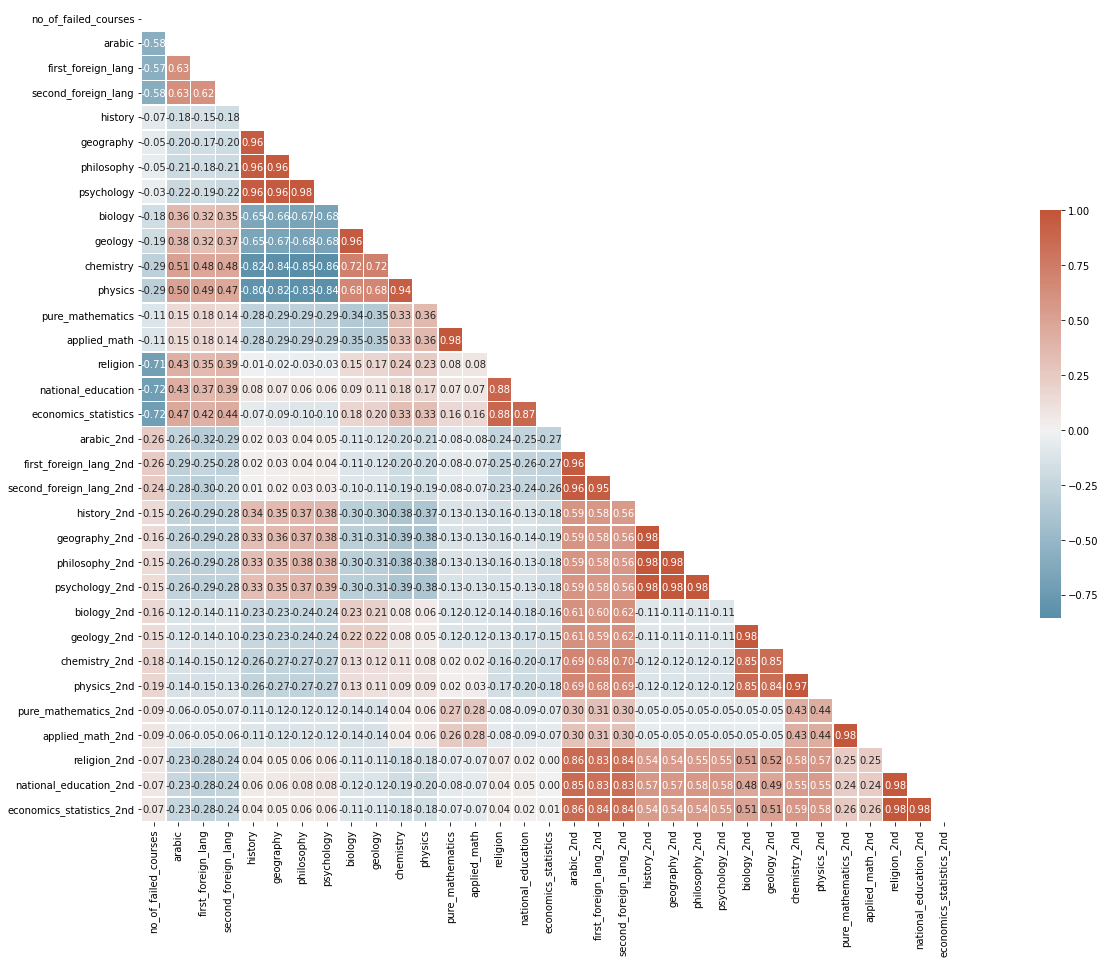

In [ ]:
# Compute the correlation matrix
df_data = data.toPandas()
corr = df_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True, fmt=".2f",
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## 4.3 Oversampling

Whenever we have imbalanced classes, we can use oversampling to generate dummy data to increase the number of samples in the category that has less samples and try to match the number of samples in both categories.

In [ ]:
#lets isolate all the data where the transactions are not fraudulent and then the data where the transactions are fradulent.
major_df = data.filter(col("can_join_uni") == "No")
minor_df = data.filter(col("can_join_uni") == "Yes")

#we will calculate the ratio to determine the difference between the number of fraudulent and non-fraudulent transactions.
ratio = int(major_df.count()/minor_df.count())
print("ratio: {}".format(ratio))

ratio: 4


In [ ]:
#create a range on this ratio and store it in variable a
a = range(ratio)

#duplicate the minority rows
oversampled_df = minor_df.withColumn("dummy", explode(array([lit(x) for x in a]))).drop('dummy')

In [ ]:
#we can now see that the minor_df has a new size which is quite similar to major_df
oversampled_df.count()

467072

In [ ]:
#combine both oversampled minority rows and previous majority rows using .unionAll()
combined_df = major_df.unionAll(oversampled_df)
combined_df.show()

+------+--------------------+----+--------------+--------------------+-------------+------------+------------------+--------------------+------------+-----------+--------------+------+------------------+-------------------+-------+---------+----------+----------+-------+-------+---------+-------+----------------+------------+--------+------------------+--------------------+--------------------+----------+----------------------+-----------------------+-----------+-------------+--------------+--------------+-----------+-----------+-------------+-----------+--------------------+----------------+------------+----------------------+------------------------+
|gender|              branch|city|administration|         school_type|homeschooling|mixed_school|    no_of_attempts|no_of_failed_courses|can_join_uni|final_grade|        status|arabic|first_foreign_lang|second_foreign_lang|history|geography|philosophy|psychology|biology|geology|chemistry|physics|pure_mathematics|applied_math|religion|nat

To test if the oversampling steps have worked perfectly, we can run the following code to see the value counts for the can_join_uni column again.

In [ ]:
combined_df.groupby('can_join_uni').count().show()

+------------+------+
|can_join_uni| count|
+------------+------+
|          No|566069|
|         Yes|467072|
+------------+------+



In [ ]:
## Before Oversampling
df_can_join = data.groupby('can_join_uni').count().toPandas()

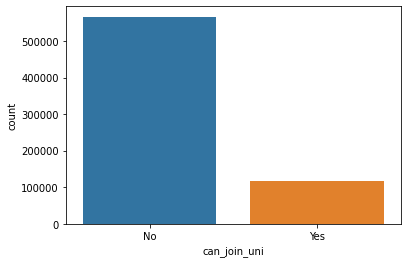

In [ ]:
sns.barplot(data=df_can_join, x='can_join_uni', y='count')

In [ ]:
## After Oversampling
df_can_join = combined_df.groupby('can_join_uni').count().toPandas()

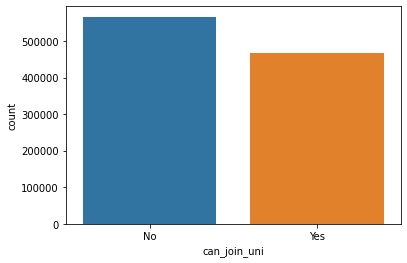

In [ ]:
sns.barplot(data=df_can_join, x='can_join_uni', y='count')

#### 4.3 Remove the least frequent categories in each category column

machine learning models to deal with that as the maximum number of categories in most models is 32. So we will keep the first 31 categories as they are, and all the infrequent ones we will put them in one category called unknown. so now we will remove the least feaquent categories from all categorical columns (to avoid errors).

- administration column

In [ ]:
n = 32
   
#take only top 31 most occuring values in each column
most_freq = combined_df.groupBy('administration').count().orderBy('count', ascending=False).take(n - 1)
    
#convert these top 31 most occuring values to pandas -> this will actually show two columns:
#one containing values, and the other containing the count
most_freq = spark.createDataFrame(most_freq).toPandas()
    
#convert the values column into list
most_freq = most_freq['administration'].tolist()

#within our main dataframe, we will only apply the administration that we have extracted earlier and 
#copy all of those rows when that state occurs and overwrite them into the state column, 
#removing less occuring categories in the administration column
combined_df = combined_df.withColumn('administration', when(col('administration').isin(most_freq), col('administration')))

#doing this will make all the other administration as null

In [ ]:
#to handle those nulls we can use .fillna and replace them with one single category called 'unknown'
combined_df = combined_df.fillna('unknown', subset='administration')

### 5. Data Preprocessing 

#### 5.1 Feature Engineering and Feature Selection

##### 5.1.1 Categorical columns encoding

In [ ]:
#This step will label encode all the categorical columns and store them in different columns with the same name + '_idx', 
#so category will become category_idx 
cat_cols = ['gender', 'branch', 'city','administration','school_type','homeschooling','mixed_school','no_of_attempts','can_join_uni','final_grade','status','status_2nd']

#StringIndexer() is equivalent to LabelEncoder()
for c in cat_cols: 
    indexer = StringIndexer(inputCol=c, outputCol=c+'_idx') #we pass the columns from the list as input one by one
    combined_df = indexer.fit(combined_df).transform(combined_df) #here we fit and transform the data altogether
    
final_df = combined_df.drop(*cat_cols) #we will drop all the categorical columns we defined earlier

In [ ]:
final_df.show(truncate=False)

+--------------------+------+------------------+-------------------+-------+---------+----------+----------+-------+-------+---------+-------+----------------+------------+--------+------------------+--------------------+----------+----------------------+-----------------------+-----------+-------------+--------------+--------------+-----------+-----------+-------------+-----------+--------------------+----------------+------------+----------------------+------------------------+----------+----------+--------+------------------+---------------+-----------------+----------------+------------------+----------------+---------------+----------+--------------+
|no_of_failed_courses|arabic|first_foreign_lang|second_foreign_lang|history|geography|philosophy|psychology|biology|geology|chemistry|physics|pure_mathematics|applied_math|religion|national_education|economics_statistics|arabic_2nd|first_foreign_lang_2nd|second_foreign_lang_2nd|history_2nd|geography_2nd|philosophy_2nd|psychology_2nd|b

In [ ]:
df = final_df.toPandas()

In [ ]:
#lets put can_join_uni_idx as hue to see if we can find something useful here
sns.pairplot(df, hue='can_join_uni_idx', corner=True)

##### 5.1.2 Vector Assembler

In [ ]:
cols = final_df.columns
cols.remove('can_join_uni_idx') 

#vector assembler will take all the columns and convert them into one column called features
assembler = VectorAssembler(inputCols=cols, outputCol='features')

In [ ]:
ML_data = assembler.setHandleInvalid("skip").transform(final_df).select('features', 'can_join_uni_idx')

In [ ]:
ML_data.show(10, truncate=False)

+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------+
|features                                                                                                                                                                                             |can_join_uni_idx|
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------+
|(44,[1,2,3,8,9,10,11,14,15,16,34,35,37,41],[47.0,25.0,26.0,30.0,44.0,30.0,33.0,18.0,20.0,27.0,1.0,1.0,1.0,1.0])                                                                                      |0.0             |
|(44,[0,1,2,4,5,6,7,14,15,16,33,35,36,37,39,41],[1.0,57.0,27.0,43.0,31.0,30.0,30.0,20.0,17.5,27.0,1.0,1.0,12.0,1.0,1.0,1.0])        

##### 5.1.3 standard Scaling 

In [ ]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
# Initialize the `standardScaler`
standardScaler = StandardScaler(inputCol="features", outputCol="features_scaled")

In [ ]:
# Fit the DataFrame to the scaler
scaled_data = standardScaler.fit(ML_data).transform(ML_data)

In [ ]:
# Inspect the result
scaled_data.select("features", "features_scaled","can_join_uni_idx").show(10, truncate=False)

+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------+
|features                                                                                                                                                 

##### 5.1.4 Data Splitting

In [ ]:
#simple data splitting
train, test = scaled_data.randomSplit([0.8, 0.2],seed=42)

In [ ]:
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 826507
Test Dataset Count: 206634


#### 5.3 Train Models

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(labelCol="can_join_uni_idx", featuresCol="features_scaled")
model_dt = dt.fit(train)

In [ ]:
# Random Forest
rf = RandomForestClassifier(labelCol="can_join_uni_idx", featuresCol="features_scaled", numTrees=10)
model_rf = rf.fit(train)

In [ ]:
# Logistic Regression
lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8, labelCol="can_join_uni_idx", featuresCol="features_scaled")
model_lr = lr.fit(train)

In [ ]:
# Gradient Boost
gbt = GBTClassifier(labelCol="can_join_uni_idx", featuresCol="features_scaled", maxIter=10)
model_gbt = gbt.fit(train)

#### 5.4 Model Evaluation

In [ ]:
pred_dt = model_dt.transform(test)

In [ ]:
pred_rf = model_rf.transform(test)

In [ ]:
pred_lr = model_lr.transform(test)

In [ ]:
pred_gbt = model_gbt.transform(test)

In [ ]:
# Accuracy Metric
evaluator_A = MulticlassClassificationEvaluator(labelCol="can_join_uni_idx", predictionCol="prediction", metricName="accuracy")

# F1 Metric
evaluator_F = MulticlassClassificationEvaluator(labelCol="can_join_uni_idx", predictionCol="prediction", metricName="f1")

# Weighted Precision
evaluator_P = MulticlassClassificationEvaluator(labelCol="can_join_uni_idx", predictionCol="prediction", metricName="weightedPrecision")

# Weighted Recall
evaluator_R = MulticlassClassificationEvaluator(labelCol="can_join_uni_idx", predictionCol="prediction", metricName="weightedRecall")

# Our models
models = [pred_dt, pred_rf, pred_lr, pred_gbt]

# Empty lists that will store the scores for each metric for each model.
accuracy = []
F1 = []
precision = []
recall = []

# Simple loop to populate the empty lists with scores of models for each metric.
for model in models:
    accuracy.append(evaluator_A.evaluate(model))
    F1.append(evaluator_F.evaluate(model))
    precision.append(evaluator_P.evaluate(model))
    recall.append(evaluator_R.evaluate(model))

In [ ]:
# We will convert all lists created above into a dataframe for easy viewing.
df_ev = pd.DataFrame(list(zip(accuracy, F1, precision, recall)), 
                     columns = ['Accuracy', 'F1-Score', 'Weighted Precision', 'Weighted Recall'],
                     index = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'Gradient Boost'])

In [ ]:
df_ev

,Accuracy,F1-Score,Weighted Precision,Weighted Recall
Decision Tree,0.950149,0.950064,0.950417,0.950149
Random Forest,0.960249,0.960298,0.960801,0.960249
Logistic Regression,0.548090,0.388094,0.300402,0.548090
Gradient Boost,0.964338,0.964326,0.964336,0.964338


In [ ]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics as metric
from pyspark import SparkContext
sc =SparkContext.getOrCreate()   # We need to create SparkContext
results = pred_dt.select(['probability', 'can_join_uni_idx'])
 
## prepare score-label set
results_collect = results.collect()
results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect]
scoreAndLabels = sc.parallelize(results_list)
 
metrics = metric(scoreAndLabels)
print("The Decision Tree ROC score is : ", metrics.areaUnderROC)

/usr/local/lib/python3.8/dist-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


The Decision Tree ROC score is :  0.9731660269227378


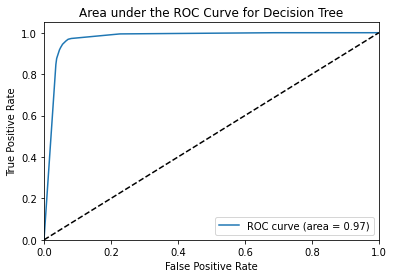

In [ ]:
from sklearn.metrics import roc_curve, auc
 
fpr = dict()
tpr = dict()
roc_auc = dict()
 
y_test = [i[1] for i in results_list]
y_score = [i[0] for i in results_list]
 
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
 
%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area under the ROC Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics as metric
from pyspark import SparkContext
sc =SparkContext.getOrCreate()   # We need to create SparkContext
results = pred_rf.select(['probability', 'can_join_uni_idx'])
 
## prepare score-label set
results_collect = results.collect()
results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect]
scoreAndLabels = sc.parallelize(results_list)
 
metrics = metric(scoreAndLabels)
print("The Random Forest ROC score is : ", metrics.areaUnderROC)

/usr/local/lib/python3.8/dist-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


The Random Forest ROC score is :  0.9937664480301316


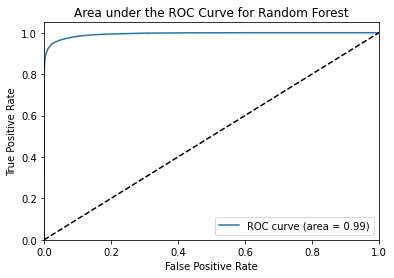

In [ ]:
from sklearn.metrics import roc_curve, auc
 
fpr = dict()
tpr = dict()
roc_auc = dict()
 
y_test = [i[1] for i in results_list]
y_score = [i[0] for i in results_list]
 
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
 
%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area under the ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics as metric
from pyspark import SparkContext
sc =SparkContext.getOrCreate()   # We need to create SparkContext
results = pred_lr.select(['probability', 'can_join_uni_idx'])
 
## prepare score-label set
results_collect = results.collect()
results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect]
scoreAndLabels = sc.parallelize(results_list)
 
metrics = metric(scoreAndLabels)
print("The Logistic Regression ROC score is : ", metrics.areaUnderROC)

/usr/local/lib/python3.8/dist-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


The Logistic Regression ROC score is :  0.793898268237579


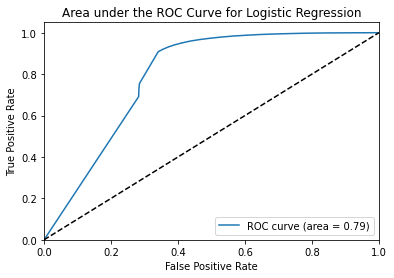

In [ ]:
from sklearn.metrics import roc_curve, auc
 
fpr = dict()
tpr = dict()
roc_auc = dict()
 
y_test = [i[1] for i in results_list]
y_score = [i[0] for i in results_list]
 
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
 
%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area under the ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics as metric
from pyspark import SparkContext
sc =SparkContext.getOrCreate()   # We need to create SparkContext
results = pred_gbt.select(['probability', 'can_join_uni_idx'])
 
## prepare score-label set
results_collect = results.collect()
results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect]
scoreAndLabels = sc.parallelize(results_list)
 
metrics = metric(scoreAndLabels)
print("The Gradient Boost ROC score is : ", metrics.areaUnderROC)

/usr/local/lib/python3.8/dist-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


The Gradient Boost ROC score is :  0.995794214382406


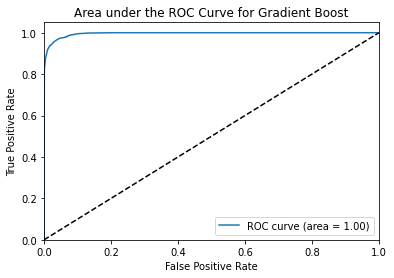

In [ ]:
from sklearn.metrics import roc_curve, auc
 
fpr = dict()
tpr = dict()
roc_auc = dict()
 
y_test = [i[1] for i in results_list]
y_score = [i[0] for i in results_list]
 
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
 
%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area under the ROC Curve for Gradient Boost')
plt.legend(loc="lower right")
plt.show()

#### 5.5 Model Selection


###### **Gradient Boost is the best model since it has the highest accuracy**

#### 5.6 Model Optimization - Hyperparameter Tuning

In [ ]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder, CrossValidatorModel

#initialize our grid -> we are using variation with only one parameter called maxIter (maximum iteration)
grid = ParamGridBuilder().addGrid(gbt.maxIter, [5, 10, 15, 20]).build()

#CrossValidator will by default have 3 folds. We can explicitly specify that using numFolds = 3
cv = CrossValidator(estimator=gbt, estimatorParamMaps=grid, evaluator=evaluator_A, parallelism=2)

#lets fit again on our training set
cvModel = cv.fit(train)

In [ ]:
#average metrics on 4 different models 
cvModel.avgMetrics 

#we can see here that more number of iterations slowly improved our model performance, however the improvement is minimal

[0.9591900651077676,
 0.9645543041192662,
 0.9668682036511292,
 0.9682219162564166]

In [ ]:
#lets try to get the accuracy of our model on the testing set
evaluator_A.evaluate(cvModel.transform(test))

0.9687127965388077

#### 5.7 Pipeline for Best Model

In [ ]:
## I added the main stages here which are: 
## 1. indexer --> for convert Categrocial Columns to numric form
## 2. assembler --> we can not directly feed the dataframe in the model. We should do VectorAssembler first
## 3. standardScaler --> to scale the numric columns
## 4. gbt --> Gradient Boost which is the best model
pipeline_gbt = Pipeline(stages=[indexer, assembler, standardScaler, gbt])